<a href="https://colab.research.google.com/github/ella00100/RenewableEnergyModel/blob/main/renewableEnergy_Model_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#재생에너지 발전량 예측제도



##1. 데이터 불러오기

In [145]:
from google.colab import files
uploaded = files.upload()

Saving test_data.csv to test_data (4).csv


In [146]:
import io
import pandas as pd
data = pd.read_csv('test_data.csv')

##2. 데이터 탐색

In [147]:
data.head()

,일자,구분1,발전소코드,발전소용량(KW),0:00,1:00,2:00,3:00,4:00,5:00,...,15:00,16:00,17:00,18:00,19:00,20:00,21:00,22:00,23:00,합계
0,2023-03-01,실측,G1053,249.48,0.00,0.00,0,0,0,0.00,...,0.10,65.80,33.60,133.70,161.1,150.5,0,0,0,640.90
1,2023-03-01,예측,G1053,249.48,0.95,0.97,0.94,0.97,0.96,0.95,...,20.08,93.61,35.62,161.20,161.2,161.2,46.95,0.89,0.98,739.26
2,2023-03-01,실측,G1018,288.00,0.00,0.00,0,0,0,0.00,...,101.26,53.50,29.09,2.21,0.0,0,0,0,0,787.25
3,2023-03-01,예측,G1018,288.00,0.00,0.00,0,0,0,0.00,...,93.33,30.84,27.05,1.43,0.0,0,0,0,0,618.75
4,2023-03-01,실측,G1034,298.08,12.40,0.00,0,0,0,0.00,...,18.60,63.80,28.80,0.60,0.0,164.2,135.6,0,0,552.40


In [148]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10478 entries, 0 to 10477
Data columns (total 29 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   일자         10478 non-null  object 
 1   구분1        10478 non-null  object 
 2   발전소코드      10478 non-null  object 
 3   발전소용량(KW)  10478 non-null  float64
 4   0:00       10478 non-null  float64
 5   1:00       10478 non-null  float64
 6   2:00       10478 non-null  object 
 7   3:00       10478 non-null  object 
 8   4:00       10478 non-null  object 
 9   5:00       10478 non-null  float64
 10  6:00       10478 non-null  float64
 11  7:00       10478 non-null  float64
 12  8:00       10478 non-null  float64
 13  9:00       10478 non-null  float64
 14  10:00      10478 non-null  float64
 15  11:00      10478 non-null  float64
 16  12:00      10478 non-null  float64
 17  13:00      10478 non-null  float64
 18  14:00      10478 non-null  float64
 19  15:00      10478 non-null  float64
 20  16:00 

In [149]:
#null 값 확인
print(data.isnull().sum())

일자           0
구분1          0
발전소코드        0
발전소용량(KW)    0
0:00         0
1:00         0
2:00         0
3:00         0
4:00         0
5:00         0
6:00         0
7:00         0
8:00         0
9:00         0
10:00        0
11:00        0
12:00        0
13:00        0
14:00        0
15:00        0
16:00        0
17:00        0
18:00        0
19:00        0
20:00        0
21:00        0
22:00        0
23:00        0
합계           0
dtype: int64


In [150]:
#결측값 확인
data.isna().sum()

일자           0
구분1          0
발전소코드        0
발전소용량(KW)    0
0:00         0
1:00         0
2:00         0
3:00         0
4:00         0
5:00         0
6:00         0
7:00         0
8:00         0
9:00         0
10:00        0
11:00        0
12:00        0
13:00        0
14:00        0
15:00        0
16:00        0
17:00        0
18:00        0
19:00        0
20:00        0
21:00        0
22:00        0
23:00        0
합계           0
dtype: int64

In [151]:
#데이터 타입 확인
print(data.dtypes)

일자            object
구분1           object
발전소코드         object
발전소용량(KW)    float64
0:00         float64
1:00         float64
2:00          object
3:00          object
4:00          object
5:00         float64
6:00         float64
7:00         float64
8:00         float64
9:00         float64
10:00        float64
11:00        float64
12:00        float64
13:00        float64
14:00        float64
15:00        float64
16:00        float64
17:00        float64
18:00        float64
19:00        float64
20:00         object
21:00         object
22:00         object
23:00         object
합계           float64
dtype: object


In [152]:
#중복된 데이터 확인
sum(data.duplicated())

0

### 열 값 범위 확인

In [153]:
data['발전소코드'].unique()

array(['G1053', 'G1018', 'G1034', 'S5004', 'S5043', 'G1039', 'S5007',
       'S5020', 'G1022', 'S5014', 'G1019', 'S5027', 'S5017', 'G1032',
       'S5021', 'S5024', 'S5032', 'S5002', 'S5028', 'S5038', 'S5009',
       'S5018', 'G1066', 'S5026', 'S5030', 'G1026', 'G1025', 'G1021',
       'G1060', 'G1030', 'S5005', 'G1017', 'S5025', 'S5033', 'G1063',
       'S5029', 'G1059', 'S5016', 'S5015', 'S5006', 'S5010', 'G1020',
       'S5041', 'S5047', 'S5022', 'S5019', 'S5008', 'S5040', 'S5011',
       'S5039', 'S5046', 'G1065', 'G1023', 'S5003', 'S5023', 'G1024',
       'G1061', 'S5042', 'S5050', 'G1051', 'G1054', 'S5001', 'G1062',
       'S5013', 'G1055', 'G1031', 'G1028', 'G1027', 'G1029', 'G1067',
       'G1068', 'G1064', 'G1058', 'G1057', 'G1056', 'G1052', 'G1050',
       'S5048', 'S5049', 'G1033', 'S5012', 'S5035', 'S5031', 'S5037',
       'S5034', 'S5045', 'S5036', 'S5044', 'B1739', 'B1737', 'B1742',
       'B1740', 'B1738', 'B1741', 'B1788', 'B1786', 'B1787', 'B1780',
       'B1779', 'B17

In [154]:
code_first = data['발전소코드'].str[0]
code_first.unique()

array(['G', 'S', 'B', 'N', 'M', 'V'], dtype=object)

 - 'G'는 화력 발전소
 - 'S'는 태양광 발전소
 - 'B'는 바이오매스 발전소
 - 'N'은 원자력 발전소
 - 'M'은 연료전지 발전소
 - 'V'는 풍력 발전소

In [155]:
data['구분1'].unique()

array(['실측', '예측'], dtype=object)

In [156]:
min_size = min(data['발전소용량(KW)'])
max_size = max(data['발전소용량(KW)'])

print(min_size, max_size)

98.825 5587.56


### 예측 데이터와 실측 데이터 분리

In [157]:
real_data = data.iloc[::2]
predic_data = data.iloc[1::2]

In [158]:
real_data.head()

,일자,구분1,발전소코드,발전소용량(KW),0:00,1:00,2:00,3:00,4:00,5:00,...,15:00,16:00,17:00,18:00,19:00,20:00,21:00,22:00,23:00,합계
0,2023-03-01,실측,G1053,249.48,0.0,0.0,0,0,0,0.0,...,0.10,65.80,33.60,133.70,161.1,150.5,0,0,0,640.90
2,2023-03-01,실측,G1018,288.00,0.0,0.0,0,0,0,0.0,...,101.26,53.50,29.09,2.21,0.0,0,0,0,0,787.25
4,2023-03-01,실측,G1034,298.08,12.4,0.0,0,0,0,0.0,...,18.60,63.80,28.80,0.60,0.0,164.2,135.6,0,0,552.40
6,2023-03-01,실측,S5004,300.80,0.0,0.0,0,0,0,0.0,...,100.80,28.18,22.52,3.54,0.0,0,0,0,0,575.38
8,2023-03-01,실측,S5043,320.76,0.0,0.0,0,0,0,0.0,...,202.84,240.25,236.49,195.64,192.6,42.67,0,0,0,1951.65


In [159]:
predic_data.head()

,일자,구분1,발전소코드,발전소용량(KW),0:00,1:00,2:00,3:00,4:00,5:00,...,15:00,16:00,17:00,18:00,19:00,20:00,21:00,22:00,23:00,합계
1,2023-03-01,예측,G1053,249.48,0.95,0.97,0.94,0.97,0.96,0.95,...,20.08,93.61,35.62,161.20,161.20,161.2,46.95,0.89,0.98,739.26
3,2023-03-01,예측,G1018,288.00,0.00,0.00,0,0,0,0.00,...,93.33,30.84,27.05,1.43,0.00,0,0,0,0,618.75
5,2023-03-01,예측,G1034,298.08,0.85,0.86,0.85,0.86,0.85,0.86,...,89.61,66.66,25.73,1.62,0.88,172.6,172.6,83.4,1.57,685.61
7,2023-03-01,예측,S5004,300.80,0.00,0.00,0,0,0,0.00,...,124.39,81.26,17.75,1.33,0.00,0,0,0,0,758.24
9,2023-03-01,예측,S5043,320.76,5.40,5.24,5.03,5.05,5.09,4.87,...,199.96,131.53,190.43,190.43,190.43,133.29,4.15,4.9,5.16,1170.54


### 데이터 타입 변환

In [160]:
data['일자'] = pd.to_datetime(data['일자'])

In [161]:
for col in data.columns:
    if data[col].dtype == 'object':
      if col != '구분1' and col != '발전소코드':
        data[col] = pd.to_numeric(data[col], errors='coerce')

In [162]:
data.dtypes

일자           datetime64[ns]
구분1                  object
발전소코드                object
발전소용량(KW)           float64
0:00                float64
1:00                float64
2:00                float64
3:00                float64
4:00                float64
5:00                float64
6:00                float64
7:00                float64
8:00                float64
9:00                float64
10:00               float64
11:00               float64
12:00               float64
13:00               float64
14:00               float64
15:00               float64
16:00               float64
17:00               float64
18:00               float64
19:00               float64
20:00               float64
21:00               float64
22:00               float64
23:00               float64
합계                  float64
dtype: object

In [163]:
data.isna().sum()

일자           0
구분1          0
발전소코드        0
발전소용량(KW)    0
0:00         0
1:00         0
2:00         1
3:00         2
4:00         1
5:00         0
6:00         0
7:00         0
8:00         0
9:00         0
10:00        0
11:00        0
12:00        0
13:00        0
14:00        0
15:00        0
16:00        0
17:00        0
18:00        0
19:00        0
20:00        1
21:00        2
22:00        1
23:00        1
합계           0
dtype: int64

In [164]:
data = data.dropna(axis = 0)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10469 entries, 0 to 10477
Data columns (total 29 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   일자         10469 non-null  datetime64[ns]
 1   구분1        10469 non-null  object        
 2   발전소코드      10469 non-null  object        
 3   발전소용량(KW)  10469 non-null  float64       
 4   0:00       10469 non-null  float64       
 5   1:00       10469 non-null  float64       
 6   2:00       10469 non-null  float64       
 7   3:00       10469 non-null  float64       
 8   4:00       10469 non-null  float64       
 9   5:00       10469 non-null  float64       
 10  6:00       10469 non-null  float64       
 11  7:00       10469 non-null  float64       
 12  8:00       10469 non-null  float64       
 13  9:00       10469 non-null  float64       
 14  10:00      10469 non-null  float64       
 15  11:00      10469 non-null  float64       
 16  12:00      10469 non-null  float64      

결측값을 가진 데이터 행을 삭제시킴으로써 9개의 행이 사라짐

### 각 시간별 데이터

In [165]:
time_names = [f"{i}:00" for i in range(24)]

time_means = []
for col in time_names:
    if col in data.columns:
        time_means.append(data[col].mean())
    else:
        time_means.append(None)

for col, col_mean in zip(time_names, time_means):
    print(f"time {col}: Mean = {col_mean}")

time 0:00: Mean = 5.540356289999044
time 1:00: Mean = 3.8512025981469096
time 2:00: Mean = 1.7852879931225523
time 3:00: Mean = 1.4307784888719075
time 4:00: Mean = 1.4131397459165154
time 5:00: Mean = 1.396815359633203
time 6:00: Mean = 3.0705024357627275
time 7:00: Mean = 60.73021874104499
time 8:00: Mean = 230.8089168019868
time 9:00: Mean = 433.9171754704365
time 10:00: Mean = 312.97480084057696
time 11:00: Mean = 350.7901079377209
time 12:00: Mean = 374.6643251504442
time 13:00: Mean = 401.14246823956444
time 14:00: Mean = 520.1231091794823
time 15:00: Mean = 478.6141016333938
time 16:00: Mean = 334.0541818702836
time 17:00: Mean = 291.8700630432706
time 18:00: Mean = 268.06616773330785
time 19:00: Mean = 266.4536584200974
time 20:00: Mean = 299.66241665870666
time 21:00: Mean = 243.4976444741618
time 22:00: Mean = 114.46459547234694
time 23:00: Mean = 41.420383035629


In [166]:
start = min(data['일자'])
end = max(data['일자'])

print(start, end)

2023-03-01 00:00:00 2023-03-31 00:00:00


##EDA

In [167]:
import matplotlib.pyplot as plt

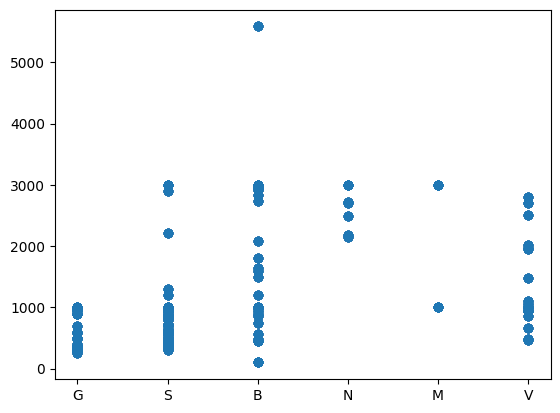

In [168]:
plt.scatter(data['발전소코드'].str[0], data['발전소용량(KW)'], alpha=0.1)

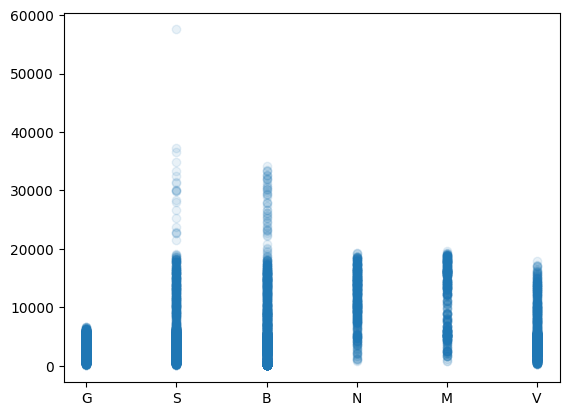

In [169]:
plt.scatter(data['발전소코드'].str[0], data['합계'], alpha= 0.1)

(array([8.036e+03, 1.169e+03, 1.012e+03, 1.910e+02, 2.600e+01, 3.100e+01,
        3.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([4.9200000e+01, 5.7976730e+03, 1.1546146e+04, 1.7294619e+04,
        2.3043092e+04, 2.8791565e+04, 3.4540038e+04, 4.0288511e+04,
        4.6036984e+04, 5.1785457e+04, 5.7533930e+04]),
 <BarContainer object of 10 artists>)

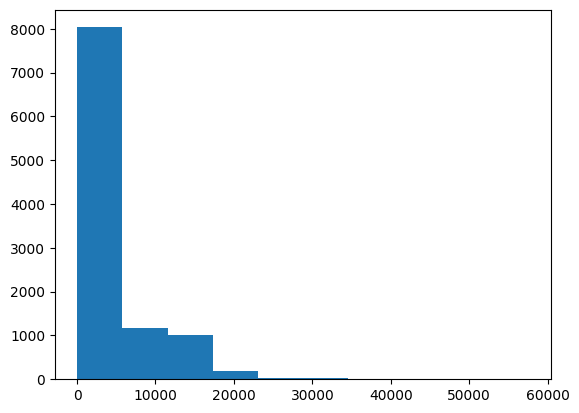

In [170]:
plt.hist(data['합계'])

(array([3463., 4340.,  434.,  496.,  496., 1178.,    0.,    0.,    0.,
          62.]),
 array([  98.825 ,  647.6985, 1196.572 , 1745.4455, 2294.319 , 2843.1925,
        3392.066 , 3940.9395, 4489.813 , 5038.6865, 5587.56  ]),
 <BarContainer object of 10 artists>)

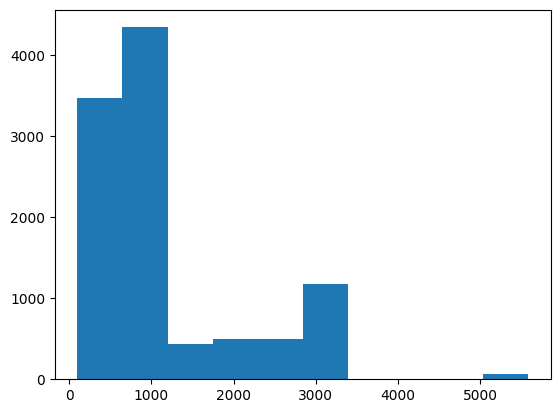

In [171]:
plt.hist(data['발전소용량(KW)'])

In [172]:
sub_d = data
sub_d['발전소코드'] = sub_d['발전소코드'].str[0]

(array([2356.,    0., 3091.,    0., 2294.,    0.,  558.,    0.,  496.,
        1674.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

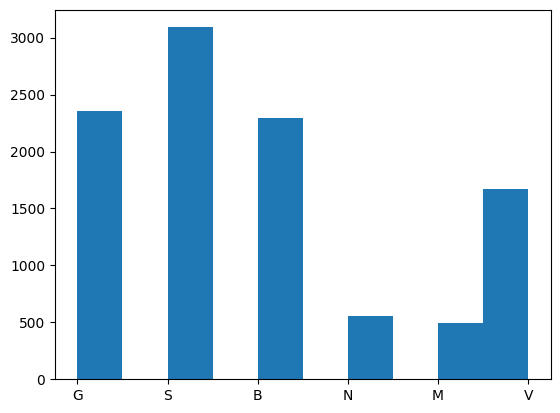

In [173]:
plt.hist(sub_d['발전소코드'])